# Vector Representations
## *Data Science Unit 4 Sprint 2 Module 2*

In [1]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [12]:
# Beautiful Soup is a Python library for pulling data out of HTML and XML files. 
from bs4 import BeautifulSoup
import requests

#index_col: Column(s) to use as the row labels of the DataFrame
df = pd.read_csv('./data/job_listings.csv', index_col=0)
# df = df.iloc[:,1:]

In [14]:
print(df.shape)
df.tail()

(426, 2)


,description,title
421,"b""<b>About Us:</b><br/>\nWant to be part of a ...",Senior Data Science Engineer
422,"b'<div class=""jobsearch-JobMetadataHeader icl-...",2019 PhD Data Scientist Internship - Forecasti...
423,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist - Insurance
424,"b""<p></p><div><p>SENIOR DATA SCIENTIST</p><p>\...",Senior Data Scientist
425,b'<div></div><div><div><div><div><p>Cerner Int...,Data Scientist


In [10]:
# # remove html tags by regex
# df['description'] = df['description'].apply(lambda comment: re.sub(r'<.*?>', '', comment))

In [24]:
df["description"][0]

'b"<div><div>Job Requirements:</div><ul><li><p>\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them</p>\\n</li><li><p>Intermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)</p>\\n</li><li><p>Exposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R</p>\\n</li><li><p>Ability to communicate Model findings to both Technical and Non-Technical stake holders</p>\\n</li><li><p>Hands on experience in SQL/Hive or similar programming language</p>\\n</li><li><p>Must show past work via GitHub, Kaggle or any other published article</p>\\n</li><li><p>Master\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.</p></li></ul><div><div><div><div><div><d

In [25]:
BeautifulSoup(df["description"][0], 'html.parser').get_text()

'b"Job Requirements:\\nConceptual understanding in Machine Learning models like Nai\\xc2\\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\\nHands on experience in SQL/Hive or similar programming language\\nMust show past work via GitHub, Kaggle or any other published article\\nMaster\'s degree in Statistics/Mathematics/Computer Science or any other quant specific field.\\nApply Now"'

In [26]:
def get_text(desc):
    soup = BeautifulSoup(desc)
    return soup.get_text(strip=True)
def strip_down(desc):
    desc = re.sub('[^A-z0-9 ]', '', desc)
    desc = desc.replace('\\n', ' ')
    desc = re.sub(' +', ' ', desc)
    return desc.lower()

In [27]:
df['description'] = df['description'].apply(get_text).apply(strip_down)
df["description"][0]

'bjob requirements conceptual understanding in machine learning models like nai\\xc2\\xa8ve bayes kmeans svm apriori linear logistic regression neural random forests decision trees knn along with handson experience in at least 2 of them intermediate to expert level coding skills in pythonr ability to write functions clean and efficient data manipulation are mandatory for this role exposure to packages like numpy scipy pandas matplotlib etc in python or ggplot2 dplyr tidyr in r ability to communicate model findings to both technical and nontechnical stake holders hands on experience in sqlhive or similar programming language must show past work via github kaggle or any other published article masters degree in statisticsmathematicscomputer science or any other quant specific field apply now'

In [28]:
df.head()

,description,title
0,bjob requirements conceptual understanding in ...,Data scientist
1,bjob description as a data scientist 1 you wil...,Data Scientist I
2,bas a data scientist you will be working on co...,Data Scientist - Entry Level
3,b4969 6756 a monthcontractunder the general su...,Data Scientist
4,blocation usa \xe2\x80\x93 multiple locations ...,Data Scientist


In [30]:
len(df['description'])

426

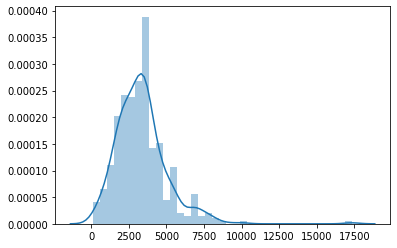

In [35]:
doc_len = [len(doc) for doc in df['description']]

import seaborn as sns
# y axis is density plot
sns.distplot(doc_len);

## 2) Use Spacy to tokenize the listings 

In [29]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [33]:
from spacy.tokenizer import Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [115]:
def tokenize(doc_s, docs=False):
    """
    doc_s: could be a single doc or multiple docs
    docs: determines if it's a single doc or multiple docs
    """
    tokens = []
    if not docs:
        tokens = []
        for token in tokenizer(doc_s):
            if (token.text not in nlp.Defaults.stop_words) and (token.is_punct != True):
                tokens.append(token.lemma_.lower().strip())
        return tokens

    for doc in tokenizer.pipe(doc_s):
        doc_tokens = []
        for token in doc:
            if (token.text not in nlp.Defaults.stop_words) and (token.is_punct != True):
                doc_tokens.append(token.lemma_.lower().strip())
        tokens.append(doc_tokens)
    return tokens

In [116]:
y1 = tokenize(df['description'], docs=True)
y2 = tokenize(df['description'][0])

In [117]:
# in y1 # of tokens in each doc is different, hence converting to array does not produce two dimensions
np.array(y1).shape, np.array(y2).shape

/Users/shahnam/opt/anaconda3/envs/ML_NLP/lib/python3.7/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  


((426,), (81,))

In [118]:
df['tokens'] = tokenize(df['description'], docs=True)

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [119]:
X = df['description']
X.shape

(426,)

In [125]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# instantiate the countvectorizer class with default sklearn vectorizer
vect = CountVectorizer(stop_words='english', max_features=1000)

#Learn our Vocab
vect.fit(X)

# Get sparse dtm
dtm = vect.transform(X)

dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm.head()

,10,100,12,2019,401k,ab,abilities,ability,able,academic,...,xae,xb7,xbb,xc2,xe2,xef,year,years,york,youll
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,8,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


## 4) Visualize the most common word counts

In [121]:
def count(docs):
    """
    Calculates some basic statistics about tokens in our corpus (i.e. corpus means collections text data)
    """

    word_counts = Counter()
    appears_in = Counter()
      
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = zip(word_counts.keys(), word_counts.values())
        
    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
    return wc.sort_values(by='rank')

In [122]:
from collections import Counter

wc = count(df['tokens'])

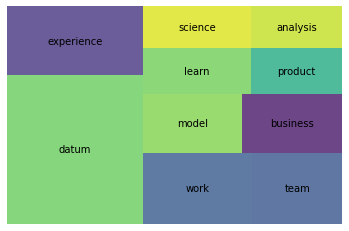

In [123]:
import squarify
import matplotlib.pyplot as plt

wc_good_top10 = wc[wc['rank'] <= 10]

squarify.plot(sizes=wc_good_top10['pct_total'], label=wc_good_top10['word'], alpha=.8 )
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix
The vectorizer function should operate on a single document not corpus of documents

In [124]:
tfidf = TfidfVectorizer(ngram_range=(1,2), stop_words='english', tokenizer=tokenize,
                        max_df=.97, min_df=2, max_features=1000)

# tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Create a vocabulary and get tfidf score per document
dtm = tfidf.fit_transform(df['description']) 

# Get feature names to use as dataframe column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# View Feature Matrix as DataFrame
dtm.head()

,1,1 year,10,100,2,2 year,2019,3,3 year,4,...,year,year experience,year relevant,year work,years\xe2\x80\x99,years\xe2\x80\x99 experience,york,you\ll,you\xe2\x80\x99ll,youll
0,0.000000,0.000000,0.0,0.0,0.126621,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.122881,0.071551,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.025538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.230827,0.267255,0.0,0.0,0.0,0.0,...,0.126329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [126]:
from sklearn.neighbors import NearestNeighbors

# Fit on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [127]:
nn.kneighbors([dtm.iloc[0].values])

(array([[0.        , 7.93725393, 8.        , 8.06225775, 9.21954446]]),
 array([[  0,   4, 114, 159, 105]]))

In [128]:
rndm_job_description = [ """
a data scientist with masters degree and work 
experience with natural language processing is preferred
"""]

In [129]:
# Query for Sim of Random doc to BBC
new_dtm = tfidf.transform(rndm_job_description)

In [130]:
nn.kneighbors(new_dtm.todense())

(array([[3.31662479, 4.47213595, 5.        , 5.56776436, 6.67315029]]),
 array([[159, 114,   4, 105, 235]]))

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 